In [27]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

import scipy as sc

# Ejercicio 5.1

In [28]:
# Datos de esfuerzo cortante y tasa de deformación para un fluido

tasa = np.array([50, 70, 90, 110, 130])
esf = np.array([6.01, 7.68, 8.59, 9.19, 10.21])

<IPython.core.display.Javascript object>


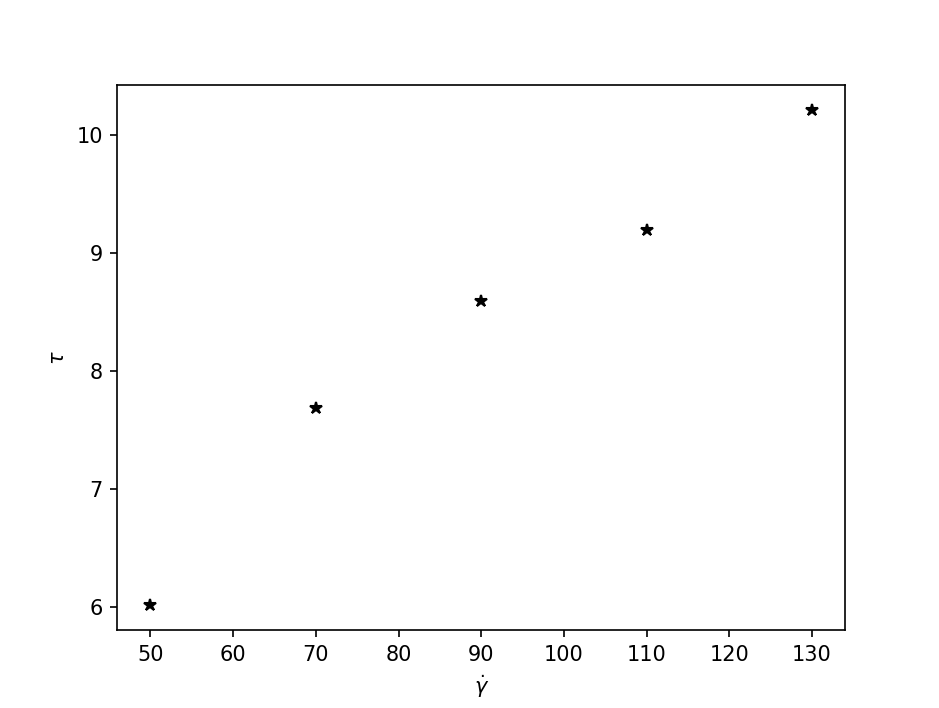

Text(0.5,0,'$\\dot{\\gamma}$')

In [29]:
plt.plot(tasa,esf, '*k')
plt.ylabel('$\\tau$')
plt.xlabel('$\dot{\gamma}$')

In [30]:
# Definir los modelos que voy a probar

def poly_1 (x,a,b):
    func = a*x + b
    return func

def poly_2 (x,a,b,c):
    func = a*(x**2) + b*x + c
    return func

def power (x, a, b):
    func = a*x**b
    return func    

In [31]:
# Polynomio de grado 1 - sin usar función

(a,b) = np.polyfit(tasa,esf,1) # encontrar parámetros
y_m1 = np.polyval([a,b],tasa) # evaluar el modelo con parámetros a,b en los puntos
err_p1 = np.sqrt(sum((y_m1-esf)**2)/y_m1.size) # evaluar el error de mi modelo en los puntos

t = np.linspace(tasa[0],tasa[-1]) # crear un vector continuo entre todos los datos de cortante
esf_m = np.polyval([a,b],t) # evaluar el modelo en todo el espacio continuo

print(err_p1)

0.255150935722


<IPython.core.display.Javascript object>


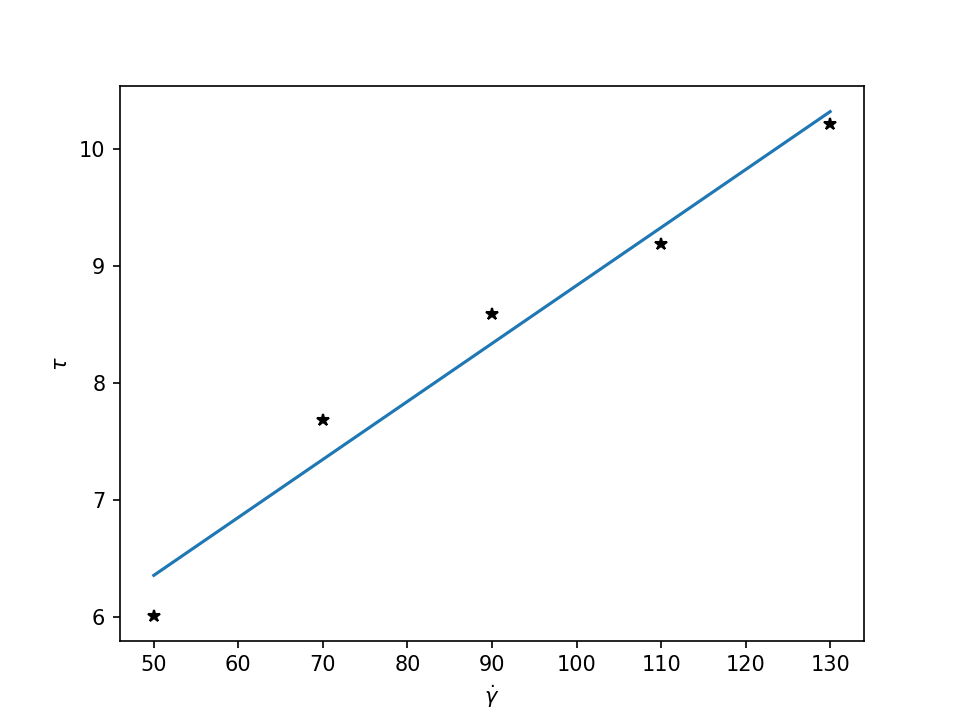

Text(0,0.5,'$\\tau$')

In [32]:
fig, f2 = plt.subplots()

f2.plot(tasa, esf, '*k')
f2.plot(t,esf_m)
f2.set_xlabel('$\dot{\gamma}$')
f2.set_ylabel('$\\tau$')

In [33]:
# Polynomio de grado 1 - usando función

esf_m2 = poly_1(t,a,b)

<IPython.core.display.Javascript object>


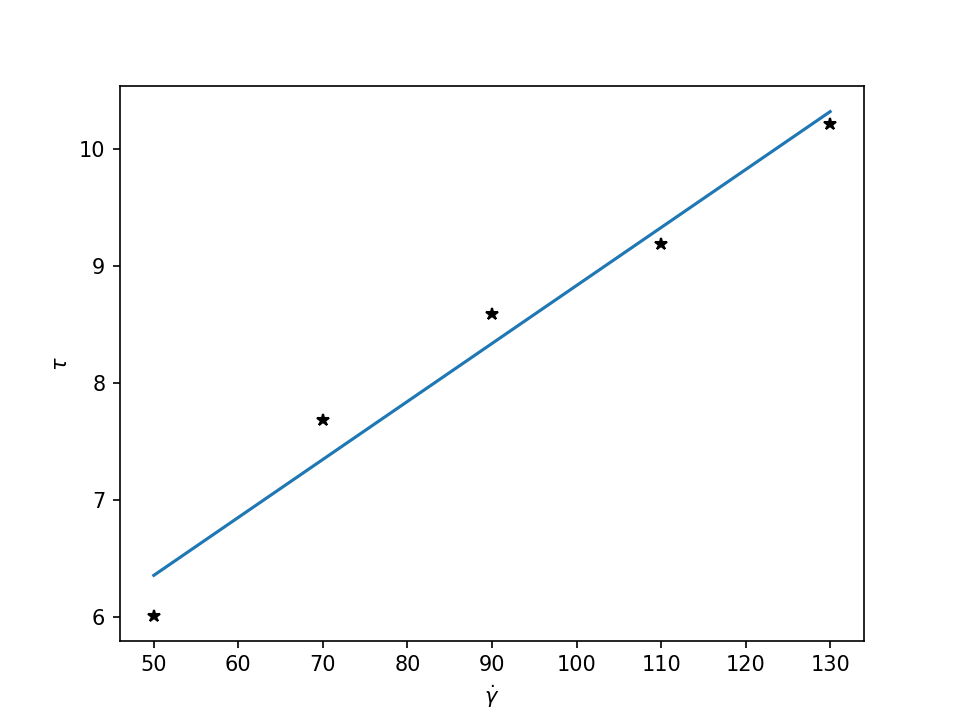

Text(0,0.5,'$\\tau$')

In [34]:
fig, f3 = plt.subplots()

f3.plot(tasa, esf, '*k')
f3.plot(t,esf_m2)
f3.set_xlabel('$\dot{\gamma}$')
f3.set_ylabel('$\\tau$')

In [35]:
# Polynomio de grado 2 - usando función

(a,b,c) = np.polyfit(tasa,esf,2) # encontrar parámetros
y_m2 = poly_2(tasa,a,b,c) # evaluar el modelo con parámetros a,b,c en los puntos
err_p2 = np.sqrt(sum((y_m2-esf)**2)/y_m2.size) # evaluar el error de mi modelo en los puntos

esf_m3 = poly_2(t,a,b,c) # evaluar el modelo en todo el espacio continuo

print(err_p2)

0.167547008329


<IPython.core.display.Javascript object>


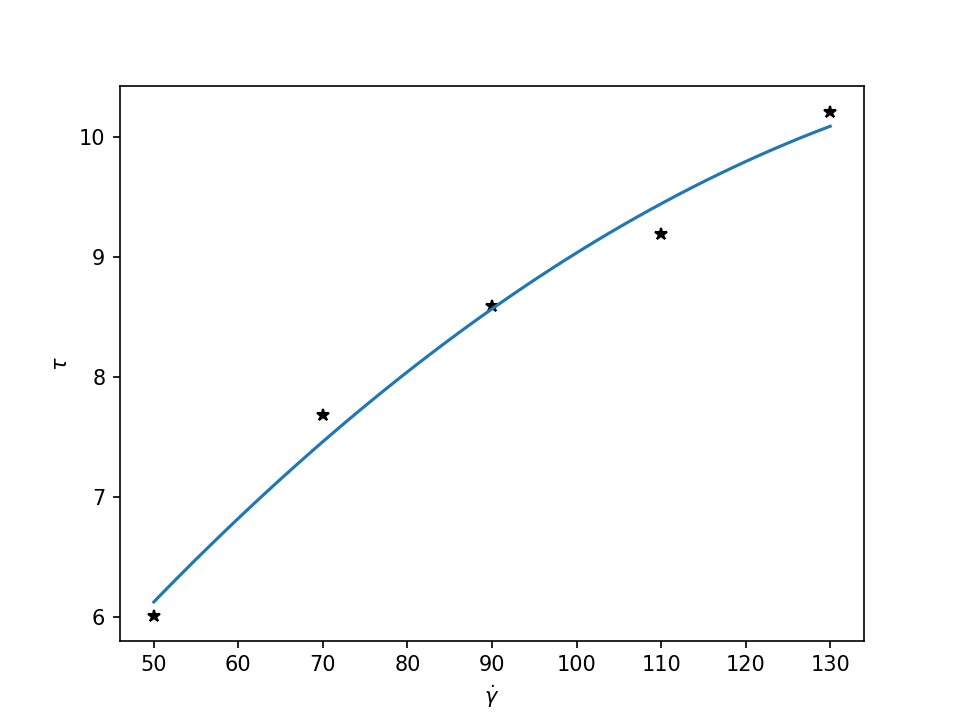

Text(0,0.5,'$\\tau$')

In [36]:
fig, f4 = plt.subplots()

f4.plot(tasa, esf, '*k')
f4.plot(t,esf_m3)
f4.set_xlabel('$\dot{\gamma}$')
f4.set_ylabel('$\\tau$')

In [26]:
popt, pconv = sc.optimize.curve_fit(power,tasa,esf) # popt tiene los parámetros a,b para el power law